# Projeto 2 - Ciência dos Dados

Nome: Ana Clara Carneiro

Nome: João Pedro Varella

___
# Classificador automático de sentimento


Neste trabalho foi realizado a construção de um classificador de sentimentos por meio da utilização de tweets para definir se eles são relevantes ou irrelevantes para a marca selecionada, sendo ela a Brahma. Este classificador foi montado por meio do método de Naive-Bayes juntamente com a suavização de Laplace.

## Preparando o ambiente no jupyter:

In [669]:
%%capture
!pip install tweepy

In [670]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
from emoji import UNICODE_EMOJI
import numpy as np

___
## Autenticando no  Twitter

* Conta: @VrauAna

In [671]:
with open('auth.pass') as fp:    
    data = json.load(fp)
    
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

___
## Etapas do projeto:

### Escolha de um produto e coleta das mensagens


In [672]:
produto = "brahma"
n = 500
t = 300
lang = 'pt'

Capturando os dados do twitter:

In [673]:
api = tweepy.API(auth)
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang, tweet_mode="extended").items(): 
    if (not msg.retweeted) and ('RT' not in msg.full_text):
        msgs.append(msg.full_text.lower())
        i += 1
    if i > n:
        break
shuffle(msgs)

Salvando os dados em uma planilha Excel:

In [674]:
if not os.path.isfile('./{0}.xlsx'.format(produto)):
    
    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))
    dft = pd.DataFrame({'Treinamento' : pd.Series(msgs[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(msgs[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)
    
    writer.save()

___
### Classificando as mensagens na coragem

Esta etapa é manual. Faça a mesma pelo Excel.

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [675]:
import pandas as pd
import numpy as np

from IPython.display import display

pd.options.display.max_rows = 13

In [676]:
excel = pd.read_excel("brahma.xlsx")
excel1 = pd.read_excel("brahma.xlsx",sheet_name="Teste")
treinamento = excel.loc[:,"Treinamento"]
teste = excel1.loc[:,"Teste"]
trein_class=excel.loc[:,"Classificando Tweets"]
test_class=excel.loc[:,"Classificando Tweets"]
tabela_teste = pd.read_excel("brahma.xlsx",1)

### Limpeza do Treinamento
Primeiramente foi realizado a limpeza da base de dados do treinamento para facilitar na classificação. Assim, foram retirados as pontuações desnecessárias, além de corrigir e adicionar espaços entre palavras/emojis e emojis/emojis. 

In [677]:
import re 

def cleanup(text):
    punctuation = '[\!-.,:?;]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

strips = []
splits = []
limpando_trein = []
for st in treinamento:
    strip = st.strip()
    strips.append(strip)
for sp in strips:
    split = ' '.join(sp.split())
    splits.append(split)
for linha in splits:
    lower=linha.lower()
    limpando_trein.append(cleanup(lower))
    
#espaçando emojis
def espaço_emoji(i):
    return i in UNICODE_EMOJI
def add_space(text):
    return ''.join(' ' + char if espaço_emoji(char) else char for char in text).strip()
treinamento_limpo=[add_space(text) for text in limpando_trein]


### Limpeza do teste
Depois foi realizado a limpeza da base de dados do teste. Assim, foram retirados as pontuações desnecessárias, além de corrigir e adicionar espaços entre palavras/emojis e emojis/emojis. 

In [678]:
tts_raw1 = pd.read_excel("brahma.xlsx",sheet_name="Teste")
tt1 = tts_raw1.loc[:,"Teste"]

import re 

def cleanup(text):
    punctuation = '[\!-.,:?;]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed


strips1 = []
splits1 = []
limpando_test = []

for st in teste:
    strip = st.strip()
    strips1.append(strip)
for sp in strips1:
    split = ' '.join(sp.split())
    splits1.append(split)
for linha in splits1:
    lower=linha.lower()
    limpando_test.append(cleanup(lower))
    
#espaçando emojis
def espaço_emoji(i):
    return i in UNICODE_EMOJI
def add_space(text):
    return ''.join(' ' + char if espaço_emoji(char) else char for char in text).strip()
teste_limpo=[add_space(text) for text in limpando_test]
df_teste=pd.DataFrame(teste_limpo,columns=["Teste"])

### Tabela de frequência absoluta e relativa
Para a construção no Naive Bayes, foi necessário realizar a construção das tabelas de frequência absoluta, para ver quantas vezes as palavras se repetem. e de frequência relativa das palavras que apareceram no excel de treinamento, para calcular a probabilidade de aparição.

#### DataFrame com classificação manual

In [679]:
df= pd.DataFrame(treinamento_limpo, columns = ['Treinamento'])
dfn=pd.DataFrame(resultados,columns=["Treinamento"])
dfn["Classificação"]=b
dfn.head()

,Treinamento,Classificação
0,eu gosto de lanche brahma cafune brahma atenç...,1
1,vou ter que tomar uma brahma 🥵,1
2,a forma que a brahma cai bem em qualquer momen...,1
3,visão da resenha tô com um engradado de latão ...,0
4,queria uma brahma geladassa agora,1


#### Tabela de frequência absoluta do treinamento

In [680]:
df = pd.DataFrame(treinamento_limpo, columns = ['Treinamento'])
trein_string = ' '.join(df.loc[:,'Treinamento'])
quant_pal_trein = pd.Series(serie_tt.split())
tabela_absoluta= quant_pal_trein.value_counts()
tabela_absoluta.head()

brahma    305
uma       135
só         97
de         74
e          72
dtype: int64

#### Tabela de frequência relativa do treinamento

In [681]:
tabela_relativa = quant_pal_trein.value_counts(True)
tabela_relativa.head()

brahma    0.095791
uma       0.042399
só        0.030465
de        0.023241
e         0.022613
dtype: float64

#### Tabelas com os Tweets relevantes e irrelevantes do treinamento

In [682]:
relevante = dfn[dfn.Classificação==1]
relevante_string = ' '.join(relevante.loc[:,'Treinamento'])
relev = pd.Series(relevante_string.split())
tab_freq_relev= relev.value_counts(True)
relevante.head()

,Treinamento,Classificação
0,eu gosto de lanche brahma cafune brahma atenç...,1
1,vou ter que tomar uma brahma 🥵,1
2,a forma que a brahma cai bem em qualquer momen...,1
4,queria uma brahma geladassa agora,1
5,brahma gelada e banho de mar 🏖 🎈 🎈,1


In [683]:
irrelevante=dfn[dfn.Classificação==0]
irrelevante_string = ' '.join(irrelevante.loc[:,'Treinamento'])
irrelev = pd.Series(irrelevante_string.split())
tab_freq_relev= irrelev.value_counts(True)
irrelevante.head()

,Treinamento,Classificação
3,visão da resenha tô com um engradado de latão ...,0
6,se sobe balão desce latão d brahma,0
9,o que meu pai quer fazer comigo quando eu comp...,0
11,doido pra chegar sexta logo vou pia na praia m...,0
22,caralho alguém aí pra tomar uma brahma comigo,0


### Classificador
Após recolher todas as informações necessárias para a construção do classificador, foi feito a separação das palavras de cada tweet e a construção de dicionários para a melhor visualização da frequência absoluta de cada palavra, onde elas representam as chaves e suas frequências seus valores. 

In [684]:
teste=[]
split_teste = []
teste_lis=df_teste.loc[:,"Teste"]
for tt in teste_lis:
    teste.append(tt)
    for palavras in teste_lis:
        novo = palavras.split()
        split_teste.append(novo)
        
dic_relev = relev.value_counts().to_dict()
dic_irrelev = irrelev.value_counts().to_dict()
relevantes = set(relev)
irrelevantes = set(irrelev)
total_pal = len(relev) + len(irrelev)


Logo em seguida foi realizado a construção do Classificador Naive-Bayes e a implementação do smoothing de Laplace, para evitar que palavras desconhecidas não recebam valores nulos e, com isso, prejudiquem o calculo final da probabilidade.

In [685]:
def classificador(tt):
    tweets_teste_split = tt.split()
    prob_irrelev = 1
    prob_relev = 1
    for p in tweets_teste_split:
        if p in dic_relev:
            prob_relev *= (dic_relev[p]+1)/(len(relev)+(total_pal))
        if p in dic_irrelev:
            prob_irrelev *= (dic_irrelev[p]+1)/(len(irrelev)+(total_pal))
        else:
            prob_irrelev *= 1/(len(irrelev)+(total_pal))
            prob_relev *= 1/(len(relev)+(total_pal))

    if prob_relev > prob_irrelev:
        return 1
    else:
        return 0

In [686]:
resultados_tt = []

for e in range(0, len(tabela_teste["Teste"])):
    resultados_tt.append(classificador(tabela_teste.loc[e,"Teste"]))
    
tabela_teste["Classificador"] = resultados_tt

        
verdadeiros_positivos = 0
falsos_positivos = 0
verdadeiros_negativos = 0
falsos_negativos = 0

tabela = len(tabela_teste["Classificador"])

for i in range(0, tabela):
    
    valor_manual = (tabela_teste.loc[i,"Classificador"])
    valor_dado = (tabela_teste.loc[i, "Classificando Tweets"])
    
    if valor_manual == 1 and valor_dado == 0:
        falsos_positivos += 1
    if valor_manual == 1 and valor_dado == 1:
        verdadeiros_positivos += 1
    if valor_manual == 0 and valor_dado == 0:
        verdadeiros_negativos += 1
    if valor_manual == 0 and valor_dado == 1:
        falsos_negativos += 1
        
        
tabela = len(tabela_teste["Classificador"])
posit_fake = falsos_positivos/tabela     
posit_true = verdadeiros_positivos/tabela
neg_true = verdadeiros_negativos/tabela
neg_fake = falsos_negativos/tabela

print("Resultados do classificador:")
print("Negativos verdadeiros: " + str(neg_true*100) + "%")
print("Negativos falsos: " + str(neg_fake*100)+ "%")
print("Positivos verdadeiros: " + str(posit_true*100) + "%")
print("Positivos falsos: " + str(posit_fake*100) + "%")


Resultados do classificador:
Negativos verdadeiros: 10.5%
Negativos falsos: 33.5%
Positivos verdadeiros: 45.5%
Positivos falsos: 10.5%


___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [687]:
resultados_tt = []

for e in range(0, len(tabela_teste["Teste"])):
    resultados_tt.append(classificador(tabela_teste.loc[e,"Teste"]))
    
tabela_teste["Classificador"] = resultados_tt

        
verdadeiros_positivos = 0
falsos_positivos = 0
verdadeiros_negativos = 0
falsos_negativos = 0

tabela = len(tabela_teste["Classificador"])

for i in range(0, tabela):
    
    valor_manual = (tabela_teste.loc[i,"Classificador"])
    valor_dado = (tabela_teste.loc[i, "Classificando Tweets"])
    
    if valor_manual == 1 and valor_dado == 0:
        falsos_positivos += 1
    if valor_manual == 1 and valor_dado == 1:
        verdadeiros_positivos += 1
    if valor_manual == 0 and valor_dado == 0:
        verdadeiros_negativos += 1
    if valor_manual == 0 and valor_dado == 1:
        falsos_negativos += 1
        
        
tabela = len(tabela_teste["Classificador"])
posit_fake = falsos_positivos/tabela     
posit_true = verdadeiros_positivos/tabela
neg_true = verdadeiros_negativos/tabela
neg_fake = falsos_negativos/tabela

print("Resultados do classificador:")
print("Negativos verdadeiros: " + str(neg_true*100) + "%")
print("Negativos falsos: " + str(neg_fake*100)+ "%")
print("Positivos verdadeiros: " + str(posit_true*100) + "%")
print("Positivos falsos: " + str(posit_fake*100) + "%")

Resultados do classificador:
Negativos verdadeiros: 10.5%
Negativos falsos: 33.5%
Positivos verdadeiros: 45.5%
Positivos falsos: 10.5%


___
### Concluindo

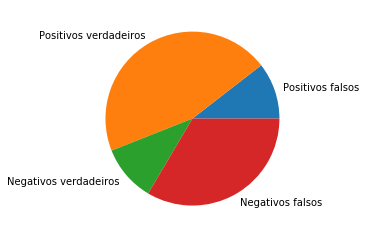

In [688]:
pie = pd.DataFrame({"": [posit_fake, posit_true, neg_true, neg_fake]}, index = ["Positivos falsos", "Positivos verdadeiros", "Negativos verdadeiros", "Negativos falsos"])
plot = pie.plot.pie(y='', legend= False)

Após a análise do comportamento de sentimentos por Naive-Bayes, obteve-se o comportamento descrito no gráfico acima. Pode-se observar que, relativamente, o classificador apresentou melhor performance em relação aos comentários positivos verdadeiros (45,5%). Em compensação, os tweets negativos e verdadeiros foram certamente classificados em apenas 10,5% dos exemplos de teste. Os tweets positivos falsos representaram também, uma precisão de 10,5%. E, por fim, os negativos falsos, 33,5%. Pode-se levantar algumas hipóteses para explicar o baixo aproveitamento do classificador.

Primeiramente, uma possível falta de coerência durante a classificação manual poderia tornar o classificador menos eficiente. Durante a classificação de todos os 500 tweets, é comum que haja uma certa incoerência, influenciando assim, o desempenho do programa. Além disso, a questão de sarcasmo e dupla negação também é muito peculiar. Devido ao fato que o classificador estuda somente as palavras em si, é impossível considerar o sentido intrínseco de uma frase. Dessa forma, o uso de duplas negações ou sarcasmos que alteram o sentido instintivo da sentença, prejudicam a qualidade do classificador.

Apesar da performance do classificador não ter sido tão precisa, é necessário considerar que durante o processo, apenas uma pequena quantidade de tweets foi estudada. Para que um melhor resultado fosse obtido, seria necessário um maior leque de tweets para uma classificação inicial. Por meio de mais aperfeiçoamento, como uma classificação mais detalhada como: muito relevante, relevante, neutro, irrelevante e muito irrelevante; seria possível tornar o classificador ainda melhor.

Um outro exemplo para a aplicação de Naive-Bayes seria na aplicação de um diagnóstico de uma nova doença: saber se o resultado de um determinado exame comprova necessariamente que um usuário possui ou não uma certa doença.
Além disso, pode ser usado como um programa de detectação de e-mails “spam”. E, como último exemplo, classificar um cliente como de alto, médio ou baixo risco para a concessão de crédito.

É importante mencionar também que é impossível alimentar a base de treinamento utilizando diretamente o classificador, pois estes não estariam classificados com a mesmo critério que os demais, mas sim classificados a partir do algoritmo do classificador, o qual apresenta erros de precisão.

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**